In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# !cp "data.csv" "/content/drive/My Drive/fifa.csv" 

In [2]:
!pip install pycaret==2.0

     |████████████████████████████████| 256kB 3.3MB/s 
     |████████████████████████████████| 266kB 8.5MB/s 
     |████████████████████████████████| 12.4MB 314kB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 266kB 41.5MB/s 
     |████████████████████████████████| 6.8MB 47.1MB/s 
     |████████████████████████████████| 1.2MB 40.7MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.6MB 37.7MB/s 
     |████████████████████████████████| 65.9MB 52kB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.1MB 42.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 32.3MB/s 
     |████████████████████████████████| 286kB 46.6MB/s 
     |████████████████████████████████| 6.0M

# **FIFA Player Market Value Prediction**

# **Import Libraries**

Importing the necessary dependancies for the Pycaret library

In [3]:
from pycaret.regression import *
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import copy
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Preprocessing**

In [5]:
fifaInput= pd.read_csv("/content/drive/My Drive/fifa.csv")

In [29]:
fifa = copy.deepcopy(fifaInput)
to_Drop = ["ID", "Photo", "Flag", "Club Logo", "Real Face", "Loaned From", "Name", "Club"]
fifa = fifa.drop(columns = to_Drop)
fifa['Value'] = fifa['Value'].str.split('\u20AC').str[1]
fifa['Wage'] = fifa['Wage'].str.split('\u20AC').str[1]
fifa['Release Clause'] = fifa['Release Clause'].str.split('\u20AC').str[1]
fifa

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,31,Argentina,94,94,110.5M,565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,33,Portugal,94,94,77M,405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,26,Brazil,92,93,118.5M,290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,27,Spain,91,93,72M,260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,27,Belgium,91,92,102M,355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,England,47,65,60K,1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K
18203,18203,19,Sweden,47,63,60K,1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K
18204,18204,16,England,47,67,60K,1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,"J

In [30]:
repl_dict = {'[kK]': '*1000', '[mM]': '*1000000', '[bB]': '*1000000000', }

# fifa = fifa.fillna(fifa.mean())
fifa['Value'] = fifa['Value'].replace(repl_dict, regex=True)
new = fifa["Value"].str.split("*", n = 1, expand = True) 
#print(new)
# making separate first name column from new data frame 
fifa["Value1"]= new[0] 
fifa["Value2"]= new[1]
fifa['Value1'] = pd.to_numeric(fifa['Value1'], errors='coerce')
fifa['Value2'] = pd.to_numeric(fifa['Value2'], errors='coerce')
fifa['Value'] = fifa['Value1'] * fifa['Value2']
fifa = fifa.drop(columns = ['Value1', 'Value2'])
fifa

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,31,Argentina,94,94,110500000.0,565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,33,Portugal,94,94,77000000.0,405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,26,Brazil,92,93,118500000.0,290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,27,Spain,91,93,72000000.0,260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,27,Belgium,91,92,102000000.0,355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,England,47,65,60000.0,1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K
18203,18203,19,Sweden,47,63,60000.0,1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K
18204,18204,16,England,47,67,60000.0,1K,1189,Right,1

In [31]:
fifa['Wage'] = fifa['Wage'].replace(repl_dict, regex=True)
new = fifa["Wage"].str.split("*", n = 1, expand = True) 
#print(new)
# making separate first name column from new data frame 
fifa["Wage1"]= new[0] 
fifa["Wage2"]= new[1]
fifa['Wage1'] = pd.to_numeric(fifa['Wage1'], errors='coerce')
fifa['Wage2'] = pd.to_numeric(fifa['Wage2'], errors='coerce')
fifa['Wage'] = fifa['Wage1'] * fifa['Wage2']
fifa = fifa.drop(columns = ['Wage1', 'Wage2'])

fifa

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,31,Argentina,94,94,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5M
1,1,33,Portugal,94,94,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1M
2,2,26,Brazil,92,93,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1M
3,3,27,Spain,91,93,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6M
4,4,27,Belgium,91,92,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,England,47,65,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143K
18203,18203,19,Sweden,47,63,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113K
18204,18204,16,England,4

In [32]:
fifa['Release Clause'] = fifa['Release Clause'].replace(repl_dict, regex=True)
new = fifa["Release Clause"].str.split("*", n = 1, expand = True)
fifa["Wage1"]= new[0] 
fifa["Wage2"]= new[1]
fifa['Wage1'] = pd.to_numeric(fifa['Wage1'], errors='coerce')
fifa['Wage2'] = pd.to_numeric(fifa['Wage2'], errors='coerce')
fifa['Release Clause'] = fifa['Wage1'] * fifa['Wage2']
fifa = fifa.drop(columns = ['Wage1', 'Wage2'])
fifa = fifa.dropna()

fifa

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,31,Argentina,94,94,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,33,Portugal,94,94,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,26,Brazil,92,93,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
4,4,27,Belgium,91,92,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,5,27,Belgium,91,91,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,England,47,65,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,19,Sweden,47,63,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,1

In [33]:
fifa.LS = fifa.LS.apply(lambda x: pd.Series(str(x).split("+")))
fifa.ST = fifa.ST.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RS = fifa.RS.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LW = fifa.LW.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LF = fifa.LF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CF = fifa.CF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RF = fifa.RF.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RW = fifa.RW.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LAM = fifa.LAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CAM = fifa.CAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RAM = fifa.RAM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RM = fifa.RM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LM = fifa.LM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CM = fifa.CM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RCM = fifa.RCM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LCM = fifa.LCM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LWB = fifa.LWB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LDM = fifa.LDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CDM = fifa.CDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RDM = fifa.RDM.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RWB = fifa.RWB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LB = fifa.LB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.LCB = fifa.LCB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.CB = fifa.CB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RCB = fifa.RCB.apply(lambda x: pd.Series(str(x).split("+")))
fifa.RB = fifa.RB.apply(lambda x: pd.Series(str(x).split("+")))

fifa

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,31,Argentina,94,94,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,33,Portugal,94,94,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,26,Brazil,92,93,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
4,4,27,Belgium,91,92,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,5,27,Belgium,91,91,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,England,47,65,60000.0,1000.0,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,42,42,42,44,44,44,44,44,45,45,45,44,45,45,45,44,44,45,45,45,44,45,45,45,45,45,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,18203,19,Sweden,47,63,60000.0,1000.0,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,45,45,45,39,42,42,42,39,40,40,40,38,35,35,35,38,30,31,31,31,30,29,32,32,32,29,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,18204,16,England,47,67,60000.0,1000.0,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,"Jul 1, 2017",2021,5'8,148lbs,45,45,45,45,46,46,46,45,44,44,44,44,38,38,38,44,34,30,30,30,34,33,28,28,28,33,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0

# **Exploratory Analysis**

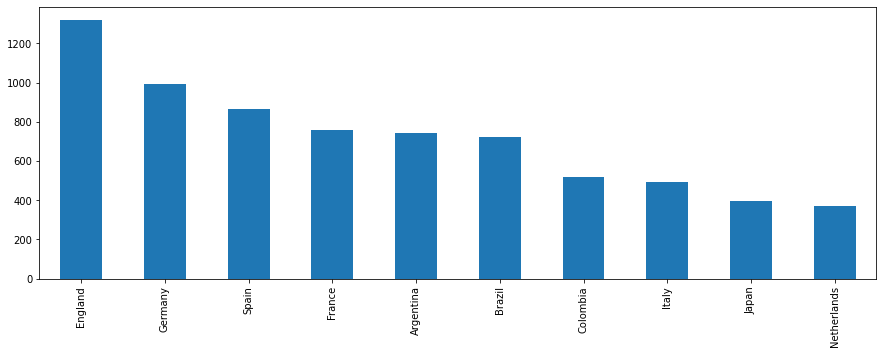

In [34]:
fifa["Nationality"].value_counts().head(10).plot(kind = 'bar', figsize = [15,5])
plt.show()

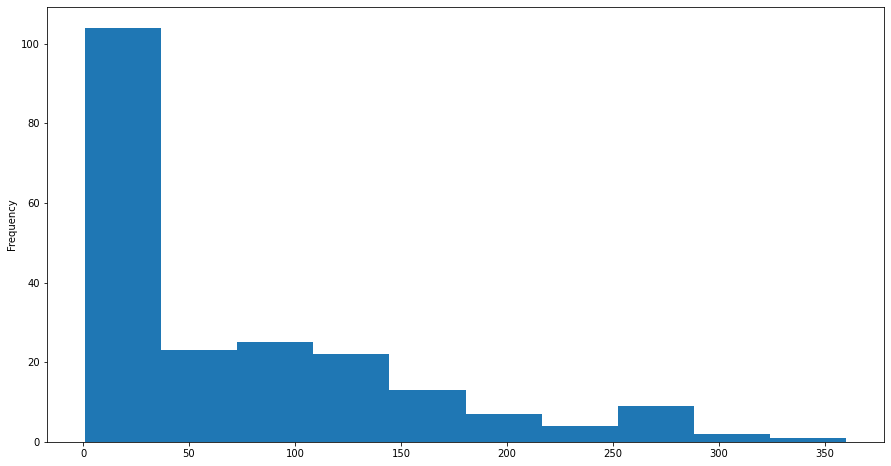

In [35]:
fifa["Value"].value_counts().plot(kind = 'hist', figsize = [15,8])
plt.show()

# **Data Modeling using Pycaret**

In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fifa, test_size = 0.9, random_state=42)
train

,Unnamed: 0,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
15998,15998,21,France,58,65,150000.0,3000.0,1464,Right,1.0,2.0,2.0,Medium/ Medium,Normal,RB,35.0,"Jul 12, 2017",2019,5'11,174lbs,48,48,48,50,49,49,49,50,49,49,49,52,50,50,50,52,57,54,54,54,57,57,56,56,56,57,56.0,36.0,48.0,52.0,35.0,53.0,31.0,36.0,47.0,52.0,64.0,61.0,52.0,54.0,57.0,44.0,56.0,62.0,61.0,41.0,58.0,58.0,49.0,39.0,40.0,45.0,51.0,63.0,60.0,8.0,13.0,9.0,9.0,9.0,315000.0
6032,6032,18,Germany,69,88,2200000.0,4000.0,1547,Right,1.0,3.0,3.0,Medium/ Medium,Lean,ST,15.0,"Jul 1, 2017",2020,6'0,172lbs,68,68,68,64,67,67,67,64,63,63,63,61,53,53,53,61,42,39,39,39,42,40,36,36,36,40,36.0,74.0,63.0,50.0,65.0,69.0,39.0,38.0,34.0,69.0,71.0,68.0,80.0,73.0,71.0,66.0,59.0,57.0,65.0,58.0,31.0,16.0,74.0,57.0,55.0,58.0,18.0,17.0,20.0,14.0,12.0,10.0,7.0,11.0,4900000.0
17678,17678,19,England,53,60,80000.0,1000.0,1425,Left,1.0,3.0,2.0,Medium/ Medium,Lean,ST,21.0,"Mar 31, 2016",2020,5'9,137lbs,51,51,51,52,51,51,51,52,49,49,49,50,45,45,45,50,48,45,45,45,48,48,46,46,46,48,46.0,57.0,40.0,43.0,33.0,54.0,32.0,29.0,32.0,52.0,59.0,63.0,69.0,57.0,74.0,46.0,65.0,50.0,54.0,40.0,52.0,54.0,56.0,38.0,55.0,40.0,37.0,42.0,41.0,12.0,14.0,9.0,10.0,10.0,156000.0
16217,16217,20,Germany,58,71,250000.0,3000.0,1419,Left,1.0,3.0,3.0,Medium/ Medium,Lean,RM,16.0,"Jul 1, 2017",2019,5'9,152lbs,51,51,51,57,54,54,54,57,55,55,55,56,50,50,50,56,43,40,40,40,43,41,34,34,34,41,55.0,51.0,40.0,54.0,50.0,67.0,57.0,47.0,51.0,60.0,68.0,67.0,78.0,46.0,76.0,45.0,34.0,45.0,44.0,44.0,38.0,21.0,47.0,52.0,53.0,50.0,23.0,30.0,25.0,13.0,10.0,8.0,13.0,7.0,606000.0
8279,8279,18,Netherlands,67,79,1300000.0,9000.0,1673,Right,1.0,3.0,3.0,Medium/ Medium,Lean,CAM,71.0,"Jul 14, 2018",2022,5'8,141lbs,60,60,60,65,64,64,64,65,65,65,65,65,61,61,61,65,53,50,50,50,53,49,41,41,41,49,64.0,58.0,42.0,64.0,60.0,72.0,70.0,64.0,57.0,70.0,72.0,72.0,68.0,62.0,81.0,64.0,60.0,66.0,54.0,60.0,39.0,36.0,52.0,72.0,52.0,54.0,35.0,29.0,28.0,10.0,13.0,11.0,11.0,5.0,2600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,6303,30,Spain,69,69,775000.0,5000.0,1890,Right,1.0,3.0,3.0,Medium/ High,Lean,LDM,6.0,"Aug 16, 2016",2020,6'0,154lbs,63,63,63,64,64,64,64,64,65,65,65,65,67,67,67,65,66,68,68,68,66,66,66,66,66,66,58.0,49.0,57.0,69.0,66.0,66.0,71.0,56.0,66.0,70.0,68.0,67.0,62.0,71.0,69.0,75.0,75.0,73.0,72.0,68.0,72.0,73.0,58.0,66.0,53.0,60.0,55.0,69.0,62.0,8.0,14.0,12.0,6.0,14.0,1200000.0
16473,16473,19,Mexico,57,71,200000.0,1000.0,1436,Right,1.0,2.0,2.0,Medium/ Medium,Normal,RB,35.0,"Jul 1, 2018",2021,5'9,170lbs,45,45,45,48,47,47,47,48,47,47,47,50,48,48,48,50,55,53,53,53,55,56,56,56,56,56,45.0,31.0,53.0,53.0,29.0,62.0,36.0,41.0,47.0,40.0,69.0,54.0,53.0,55.0,68.0,31.0,56.0,62.0,57.0,28.0,54.0,54.0,49.0,37.0,45.0,38.0,49.0,67.0,64.0,13.0,5.0,8.0,13.0,8.0,465000.0
6559,6559,18,Spain,69,86,2200000.0,24000.0,1628,Right,1.0,5.0,4.0,Medium/ Medium,Normal,LW,55.0,"Aug 31, 2016",2019,5'7,150lbs,62,62,62,68,68,68,68,68,68,68,68,67,60,60,60,67,50,46,46,46,50,45,37,37,37,45,53.0,66.0,30.0,71.0,44.0,76.0,62.0,47.0,50.0,74.0,78.0,71.0,81.0,61.0,84.0,70.0,65.0,58.0,38.0,63.0,41.0,20.0,65.0,64.0,

Setting up a pycaret session

In [38]:
session_1 = setup(train, target = 'Value', session_id=1, log_experiment=False, experiment_name='Cases_1')
# , pca = True, pca_method='linear'

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1474, 81)"
4,Missing Values,False
5,Numeric Features,71
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [39]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Lasso Least Angle Regression,282783.0442,423761074666.3661,618255.7624,0.9794,0.5431,0.3628,0.0554
1,Gradient Boosting Regressor,249016.2020,697890264418.2385,718749.2301,0.9793,0.1910,0.1494,1.3029
2,Elastic Net,321864.4501,439091653534.2890,634103.3412,0.9787,0.6109,0.5726,0.2823
3,Huber Regressor,272589.6630,441193740635.0476,643752.9687,0.9786,0.2102,0.1589,0.1302
4,Bayesian Ridge,270370.4972,451737756385.2668,636500.0104,0.9784,0.4566,0.2395,0.1347
5,Extreme Gradient Boosting,267334.9126,663289327027.7209,752380.4902,0.9778,0.2164,0.1699,0.5436
6,TheilSen Regressor,363298.5789,467526227166.3256,661961.4975,0.9777,0.7542,0.6181,539.9337
7,Ridge Regression,376534.7130,451663765364.9515,647883.3563,0.9777,0.7450,0.7241,0.0197
8,Orthogonal Matching Pursuit,321516.2408,474298331234.1436,660397.7113,0.9761,0.5408,0.4595,0.0211
9,Lasso Regression,391584.6039,496889428240.3161,683211.5390,0.9748,0.7241,0.7383,0.3531


In [40]:
model_metadata = models()
model_metadata['Name']

ID
lr                          Linear Regression
lasso                        Lasso Regression
ridge                        Ridge Regression
en                                Elastic Net
lar                    Least Angle Regression
llar             Lasso Least Angle Regression
omp               Orthogonal Matching Pursuit
br                             Bayesian Ridge
ard         Automatic Relevance Determination
par              Passive Aggressive Regressor
ransac                Random Sample Consensus
tr                         TheilSen Regressor
huber                         Huber Regressor
kr                               Kernel Ridge
svm                    Support Vector Machine
knn                     K Neighbors Regressor
dt                              Decision Tree
rf                              Random Forest
et                      Extra Trees Regressor
ada                        AdaBoost Regressor
gbr               Gradient Boosting Regressor
mlp                    Multi Le

In [58]:
llar  = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,242943.5319,317938532908.5282,563860.3842,0.9899,0.5490,0.3871
1,272474.3952,255396296253.6623,505367.4863,0.9955,0.4174,0.4260
2,299320.0049,384062866058.8424,619728.0582,0.9951,0.6462,0.4325
3,233591.5346,163123816830.0286,403885.8958,0.9920,0.6024,0.4074
4,310272.4685,757208717093.8486,870177.4055,0.9405,0.4307,0.1767
5,239171.0924,288630406424.4498,537243.3400,0.9691,0.8464,0.3859
6,392617.9219,1191661077892.1279,1091632.2998,0.9648,0.4253,0.4027
7,257183.3933,168887542836.5881,410959.2958,0.9782,0.5327,0.3221
8,275441.9692,253692864859.1576,503679.3274,0.9822,0.3591,0.3421
9,304814.1295,457008625506.4266,676024.1309,0.9871,0.6219,0.3450


In [59]:
gbr  = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,235734.6989,437268521792.1236,661262.8235,0.9861,0.2263,0.1735
1,239582.3790,246721789834.1528,496710.9721,0.9957,0.1793,0.1368
2,344322.7507,3366666462331.4697,1834847.8036,0.9569,0.1705,0.1361
3,247847.7778,910555587931.8813,954230.3642,0.9553,0.1938,0.1402
4,260095.0887,366795816073.5381,605636.7030,0.9712,0.1674,0.1311
5,165263.0013,95822971602.6585,309552.8575,0.9897,0.1760,0.1331
6,272568.9045,614652691055.9829,783997.8897,0.9818,0.1845,0.1447
7,179339.0986,112536689841.8306,335464.8862,0.9855,0.1773,0.1449
8,208126.7229,143081559525.7167,378261.2319,0.9900,0.1910,0.1550
9,337281.5981,684800554193.0310,827526.7695,0.9806,0.2443,0.1986


In [60]:
en  = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,314520.8248,372394275396.3943,610241.1617,0.9882,0.6919,0.6782
1,313363.3779,279816560903.9476,528976.9002,0.9951,0.6625,0.7353
2,294572.0500,356054391770.7558,596702.9343,0.9954,0.8665,0.4919
3,289293.1310,302410799111.7908,549918.9023,0.9852,0.6134,0.6220
4,359663.1823,823463360870.0308,907448.8200,0.9353,0.3746,0.3215
5,277214.4139,242500630821.6496,492443.5306,0.9740,0.3776,0.4259
6,431248.4753,1145975018672.9460,1070502.2273,0.9661,0.6403,0.6521
7,270836.6835,171228571957.6938,413797.7428,0.9779,0.5140,0.4214
8,324672.5398,259930162773.1474,509833.4657,0.9817,0.7563,0.6482
9,343259.8229,437142763064.5327,661167.7269,0.9876,0.6120,0.7298


In [61]:
tuned_llar = tune_model(llar)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,289979.0259,322089950804.6690,567529.6916,0.9898,0.4839,0.5108
1,232743.8326,227522353294.4826,476993.0328,0.9960,0.3679,0.2513
2,251980.3530,365312028384.2730,604410.4800,0.9953,0.3774,0.2472
3,239734.2039,169203004572.4914,411342.9282,0.9917,0.6680,0.4263
4,309129.0897,755943408649.7677,869450.0610,0.9406,0.3532,0.1796
5,300644.1337,358718738645.5584,598931.3305,0.9616,0.6977,0.5089
6,387895.1744,1185057819017.0984,1088603.6097,0.9650,0.3973,0.3048
7,288825.5266,183906942546.0412,428843.7274,0.9763,0.5001,0.4076
8,319896.7195,290853935709.5784,539308.7573,0.9796,0.6416,0.4787
9,368209.4311,521650478342.3383,722253.7493,0.9852,0.5062,0.6609


In [62]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,558122.9387,5272560990477.8496,2296205.7814,0.8323,0.2633,0.2076
1,739998.4752,7569379251828.7100,2751250.4887,0.8679,0.2870,0.2096
2,831756.5941,13798195187051.3418,3714592.1966,0.8234,0.2634,0.1865
3,340452.8458,908205269923.9082,952998.0430,0.9555,0.2754,0.1924
4,674109.4217,3846016468705.2871,1961126.3266,0.6976,0.3031,0.2124
5,395772.3860,819668446328.4290,905355.4254,0.9121,0.3706,0.2376
6,561391.2692,2465924916451.6304,1570326.3726,0.9271,0.3657,0.1839
7,299570.2771,316935959481.7112,562970.6560,0.9591,0.2940,0.1957
8,396341.8760,1207542097136.1785,1098882.2035,0.9152,0.2352,0.1916
9,882730.1880,12974755653040.2793,3602048.8133,0.6325,0.3279,0.2408


In [63]:
tuned_en = tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,313386.9529,369029649933.3783,607478.1065,0.9883,0.6378,0.6914
1,314569.0319,279983556880.9034,529134.7247,0.9951,0.6247,0.7503
2,292879.1641,354436751713.6628,595345.9093,0.9955,0.7697,0.4970
3,290623.1410,300547186625.9410,548221.8407,0.9853,0.6245,0.6329
4,359787.9423,814824678870.1437,902676.3976,0.9359,0.4036,0.3250
5,278805.5993,241523530453.4208,491450.4354,0.9741,0.3844,0.4314
6,431369.8737,1139086954764.6711,1067280.1669,0.9663,0.6725,0.6736
7,272358.7211,171746519052.9784,414423.1160,0.9779,0.4813,0.4294
8,324856.6863,261958193571.1935,511818.5162,0.9816,0.7129,0.6533
9,345653.6038,438950557480.9849,662533.4388,0.9876,0.5609,0.7611


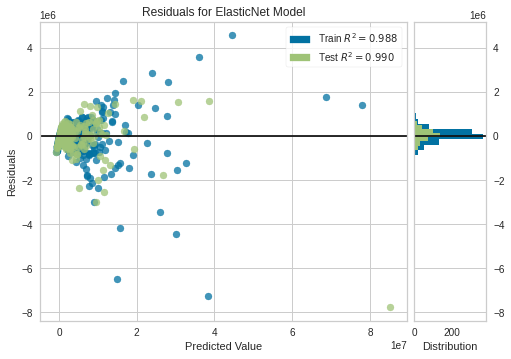

In [64]:
plot_model(tuned_en)

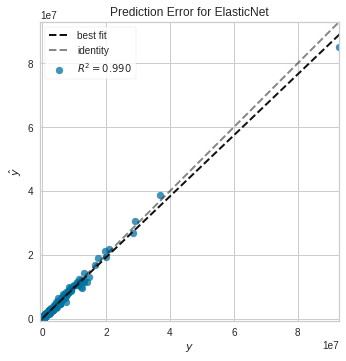

In [65]:
plot_model(tuned_en, plot = 'error')

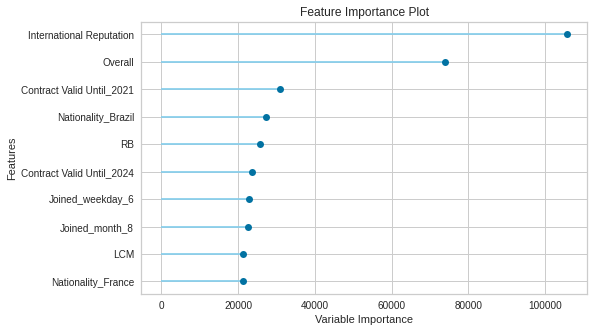

In [66]:
plot_model(tuned_en, plot='feature')

In [67]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [68]:
evaluate_model(tuned_en)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [69]:
evaluate_model(tuned_llar)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
blend = blend_models(estimator_list = [tuned_llar, tuned_gbr, tuned_en])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,298124.0824,611464768604.9042,781962.1273,0.9806,0.5947,0.3850
1,338157.1802,757889217295.3031,870568.3301,0.9868,0.4962,0.3490
2,380954.5559,1594002809665.1304,1262538.2409,0.9796,0.4179,0.2603
3,275082.5747,333937002788.1300,577872.8258,0.9836,0.5529,0.4655
4,318669.4518,599903488246.2401,774534.3687,0.9528,0.3643,0.1977
5,279616.8154,260830511409.8741,510715.6855,0.9720,0.5768,0.3315
6,315413.1655,596632593213.6093,772419.9591,0.9824,0.4040,0.3430
7,240057.2984,171721535478.8066,414392.9723,0.9779,0.3392,0.2769
8,283373.2155,350993014683.1928,592446.6345,0.9753,0.3539,0.3814
9,467484.1193,2111686762935.4600,1453164.3964,0.9402,0.4916,0.4367


In [71]:
pred = predict_model(blend);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,312303.2999,9.819626e+11,990940.2462,0.9719,0.4618,0.3341


In [72]:
final_blend = finalize_model(blend)

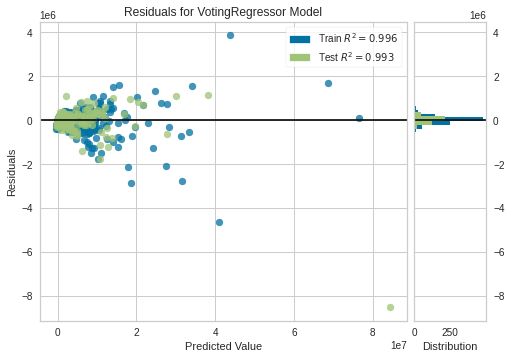

In [73]:
plot_model(final_blend)

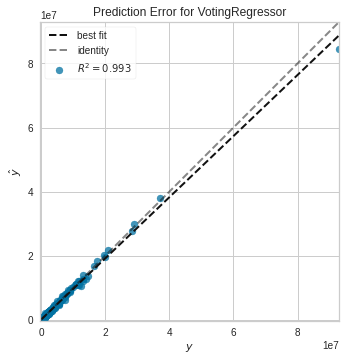

In [74]:
plot_model(final_blend, plot = 'error')

In [75]:
save_model(final_blend,'Final Blend Model 05August2020')

Transformation Pipeline and Model Succesfully Saved
